In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix



In [6]:
# Load CSV
df = pd.read_csv("Titanic-Dataset.csv")  # Make sure CSV is in the same folder
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
print("Shape",df.shape)

Shape (891, 12)


In [10]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [16]:
df.describe(include='all').T



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [20]:
missing = df.isnull().sum().sort_values(ascending=False)
missing



Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [21]:
for col in ['Survived', 'Pclass', 'Sex', 'Embarked']:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False))
    print(df[col].value_counts(normalize=True) * 100)



--- Survived ---
Survived
0    549
1    342
Name: count, dtype: int64
Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

--- Pclass ---
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Pclass
3    55.106622
1    24.242424
2    20.650954
Name: proportion, dtype: float64

--- Sex ---
Sex
male      577
female    314
Name: count, dtype: int64
Sex
male      64.758698
female    35.241302
Name: proportion, dtype: float64

--- Embarked ---
Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64
Embarked
S    72.440945
C    18.897638
Q     8.661417
Name: proportion, dtype: float64


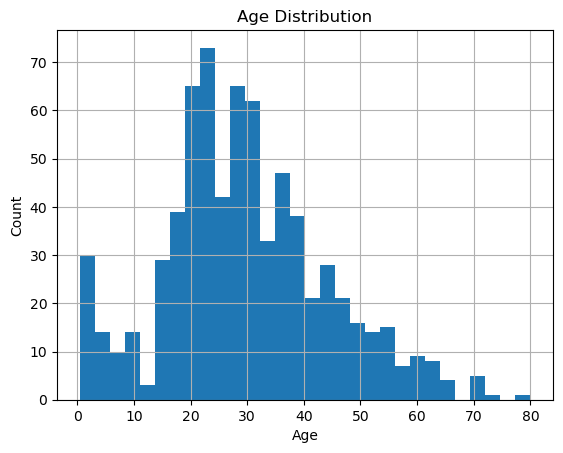

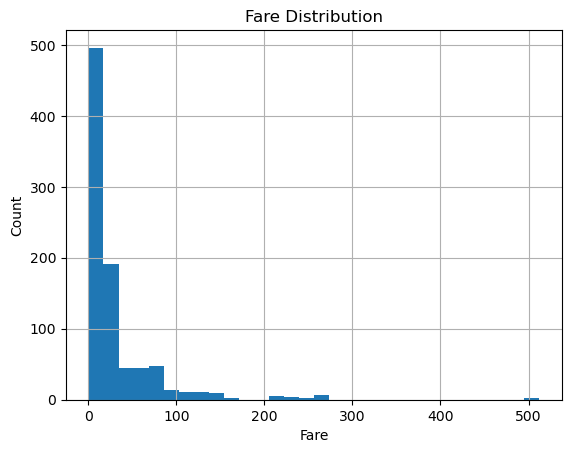

In [24]:
df['Age'].dropna().hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

df['Fare'].dropna().hist(bins=30)
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()


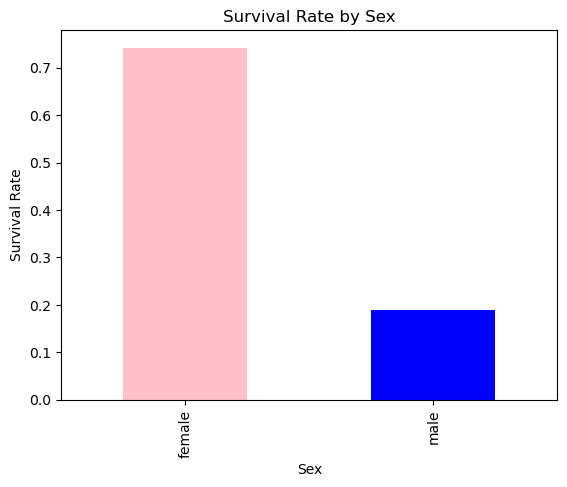

Sex
female    74.20
male      18.89
Name: Survived, dtype: float64


In [25]:
survival_by_sex = df.groupby('Sex')['Survived'].mean()
survival_by_sex.plot(kind='bar', color=['pink', 'blue'])
plt.title("Survival Rate by Sex")
plt.ylabel("Survival Rate")
plt.show()

print((survival_by_sex * 100).round(2))


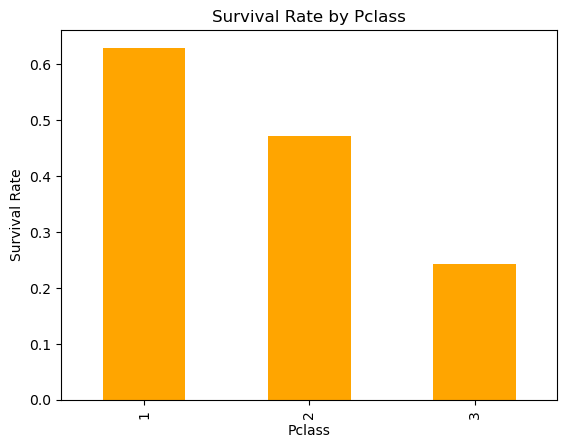

Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64


In [26]:
survival_by_pclass = df.groupby('Pclass')['Survived'].mean()
survival_by_pclass.plot(kind='bar', color='orange')
plt.title("Survival Rate by Pclass")
plt.ylabel("Survival Rate")
plt.show()

print((survival_by_pclass * 100).round(2))


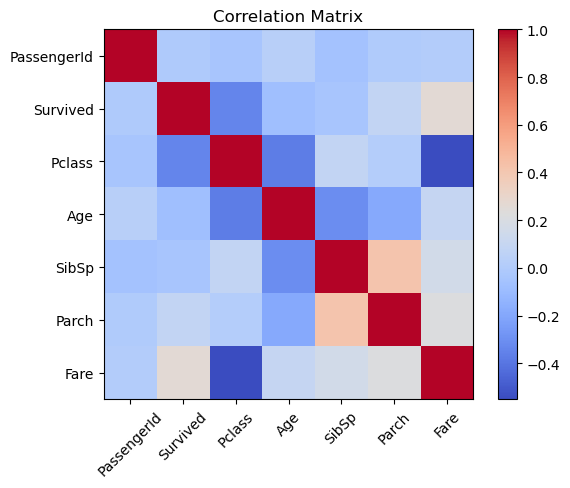

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [29]:
corr = df.corr(numeric_only=True)
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Matrix")
plt.show()
corr


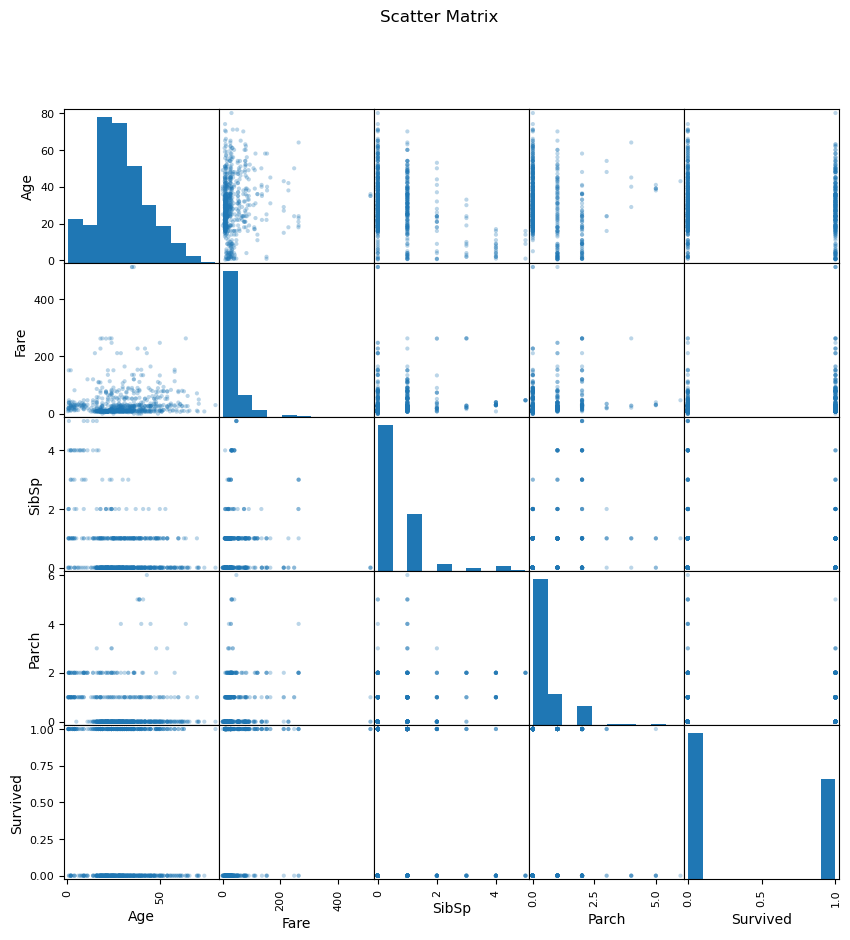

In [30]:
cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
scatter_matrix(df[cols].dropna(), figsize=(10, 10), alpha=0.3)
plt.suptitle("Scatter Matrix")
plt.show()


In [31]:
summary = {
    "Total Rows": df.shape[0],
    "Missing Age": missing.get('Age', 0),
    "Missing Cabin": missing.get('Cabin', 0),
    "Missing Embarked": missing.get('Embarked', 0),
    "Overall Survival Rate (%)": round(df['Survived'].mean() * 100, 2),
    "Survival by Sex (%)": (df.groupby('Sex')['Survived'].mean() * 100).round(2).to_dict(),
    "Survival by Pclass (%)": (df.groupby('Pclass')['Survived'].mean() * 100).round(2).to_dict()
}
summary


{'Total Rows': 891,
 'Missing Age': 177,
 'Missing Cabin': 687,
 'Missing Embarked': 2,
 'Overall Survival Rate (%)': 38.38,
 'Survival by Sex (%)': {'female': 74.2, 'male': 18.89},
 'Survival by Pclass (%)': {1: 62.96, 2: 47.28, 3: 24.24}}